In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import folium
import re

In [3]:
data = pd.read_csv('tfnsw.csv')
data

date  40041    006   53004    001   22001  02393  \
0       2013-01-02 00:00:00  383.0    0.0   307.0    0.0   605.0  112.0   
1       2013-01-02 01:00:00  218.0    0.0   161.0    0.0   309.0   72.0   
2       2013-01-02 02:00:00  161.0    0.0   126.0    0.0   176.0   56.0   
3       2013-01-02 03:00:00  115.0    0.0   178.0    0.0   178.0   54.0   
4       2013-01-02 04:00:00  227.0    0.0   290.0    0.0   268.0   70.0   
...                     ...    ...    ...     ...    ...     ...    ...   
100027  2024-05-31 19:00:00    0.0  381.0  2120.0  359.0  2146.0  604.0   
100028  2024-05-31 20:00:00    0.0  370.0  1577.0  218.0  1803.0  463.0   
100029  2024-05-31 21:00:00    0.0  273.0  1485.0  240.0  1883.0  440.0   
100030  2024-05-31 22:00:00    0.0  233.0  1357.0  118.0  1999.0  486.0   
100031  2024-05-31 23:00:00    0.0  168.0   914.0   81.0  1408.0  397.0   

        100001   50240  66249  ...   74229   72027   32029  24021  02413  \
0        208.0   132.0  211.0  ...   132.0     0.0    55.0  317.0   67.0   
1        115.0    90.0  111.0  ...    46.0     0.0    26.0  167.0   33.0   
2         81.0    86.0   91.0  ...    34.0     0.0    19.0  134.0   33.0   
3         91.0   136.0  118.0  ...    33.0     0.0    30.0  132.0   42.0   
4        144.0   205.0  141.0  ...    47.0     0.0    32.0  199.0   68.0   
...        ...     ...    ...  ...     ...     ...     ...    ...    ...   
100027  1942.0  4160.0  533.0  ...  1379.0  1721.0  1186.0    0.0    0.0   
100028  1648.0  3277.0  392.0  ...   998.0  1151.0   861.0    0.0    0.0   
100029  1476.0  2983.0  311.0  ...   947.0   992.0   853.0    0.0    0.0   
100030  1343.0  2992.0  306.0  ...   814.0   825.0   845.0    0.0    0.0   
100031  1066.0  2131.0  192.0  ...   540.0   519.0   551.0    0.0    0.0   

         10011   68025  18011   74228  57025  
0        699.0   291.0   42.0   157.0   84.0  
1        401.0   153.0   35.0    67.0   49.0  
2        290.0    94.0   50.0    58.0   39.0  
3        247.0    87.0   59.0    67.0   48.0  
4        240.0   151.0  145.0   117.0   97.0  
...        ...     ...    ...     ...    ...  
100027  3093.0  1652.0    0.0  1426.0  713.0  
100028  2398.0  1382.0    0.0   958.0  566.0  
100029  2356.0  1339.0    0.0   849.0  544.0  
100030  2141.0  1055.0    0.0   693.0  410.0  
100031  1677.0   785.0    0.0   450.0  230.0  

[100032 rows x 28 columns]

In [7]:
data['date'] = pd.to_datetime(data['date'])

data_2001 = data[data['date'].dt.year == 2016]
data_2003 = data[data['date'].dt.year == 2018]
data_2005 = data[data['date'].dt.year == 2022]

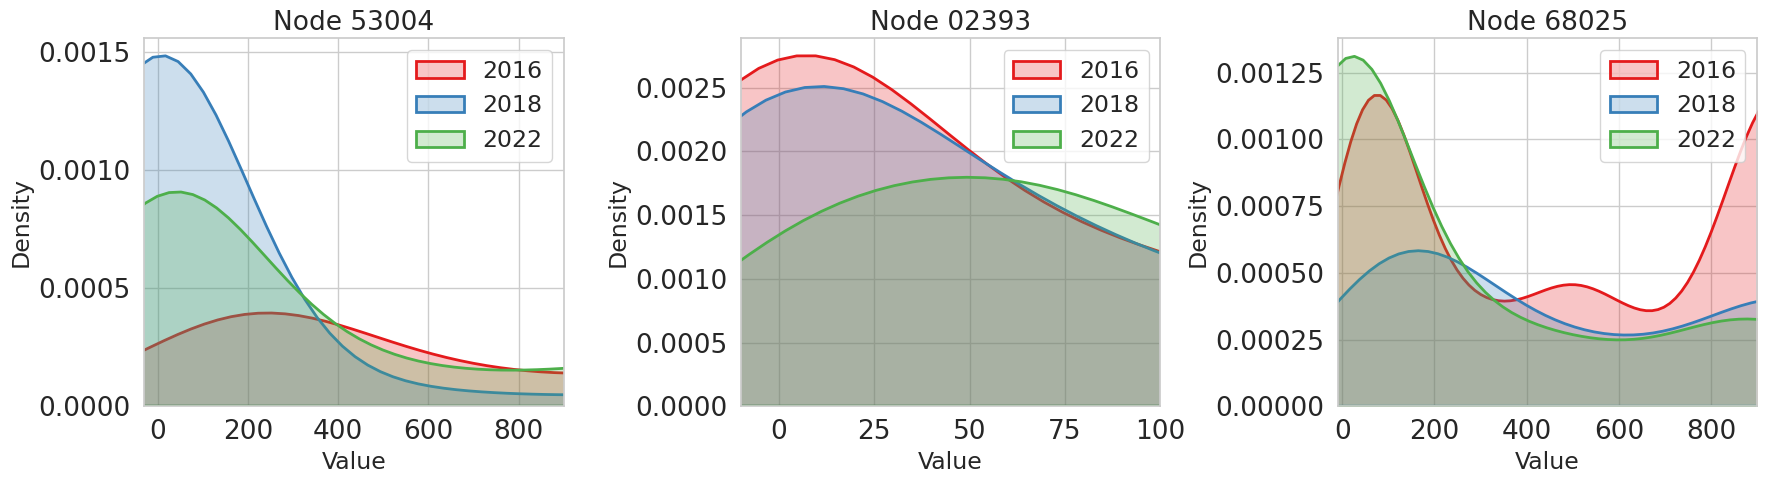

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette("Set1")
node1='53004'
node2='02393'
node3='68025'
# 示例数据：生成三组时间序列数据
np.random.seed(42)
data_time = {
    '6 am': data_2001[node1],
    '12 am': data_2003[node1],
    '8 pm': data_2005[node1]
}

data_location = {
    'location 11': data_2001[node2],
    'location 10': data_2003[node2],
    'location 20': data_2005[node2]
}

data_source = {
    'source A (BikeIn)': data_2001[node3],
    'source B (BikeOut)': data_2003[node3],
    'source C (TaxiIn)': data_2005[node3]
}

# 将数据转换为DataFrame
df_time = pd.DataFrame(data_time)
df_location = pd.DataFrame(data_location)
df_source = pd.DataFrame(data_source)

# 设置图表风格
sns.set(style="whitegrid")

# 设置字号
title_fontsize = 19
label_fontsize = 17
legend_fontsize = 17
tick_fontsize = 19
linewidth_size=2

# 绘制密度图
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

sns.kdeplot(data=df_time['6 am'], ax=axes[0], linewidth=linewidth_size, fill=True, label='2016', color=colors[0])
sns.kdeplot(data=df_time['12 am'], ax=axes[0], linewidth=linewidth_size,fill=True, label='2018', color=colors[1])
sns.kdeplot(data=df_time['8 pm'], ax=axes[0], linewidth=linewidth_size,fill=True, label='2022', color=colors[2])
axes[0].set_title('Node '+node1, fontsize=title_fontsize)
axes[0].set_xlabel('Value', fontsize=label_fontsize)
axes[0].set_ylabel('Density', fontsize=label_fontsize)
axes[0].legend( fontsize=legend_fontsize, title_fontsize=legend_fontsize)
axes[0].tick_params(axis='both', which='major', labelsize=tick_fontsize)
axes[0].set_xlim(-30, 900)

sns.kdeplot(data=df_location['location 11'], ax=axes[1], linewidth=linewidth_size,fill=True, label='2016', color=colors[0])
sns.kdeplot(data=df_location['location 10'], ax=axes[1], linewidth=linewidth_size,fill=True, label='2018', color=colors[1])
sns.kdeplot(data=df_location['location 20'], ax=axes[1], linewidth=linewidth_size,fill=True, label='2022', color=colors[2])
axes[1].set_title('Node '+node2, fontsize=title_fontsize)
axes[1].set_xlabel('Value', fontsize=label_fontsize)
axes[1].set_ylabel('Density', fontsize=label_fontsize)
axes[1].legend(fontsize=legend_fontsize, title_fontsize=legend_fontsize)
axes[1].tick_params(axis='both', which='major', labelsize=tick_fontsize)
axes[1].set_xlim(-10, 100)

sns.kdeplot(data=df_source['source A (BikeIn)'], ax=axes[2], linewidth=linewidth_size,fill=True, label='2016', color=colors[0])
sns.kdeplot(data=df_source['source B (BikeOut)'], ax=axes[2], linewidth=linewidth_size,fill=True, label='2018', color=colors[1])
sns.kdeplot(data=df_source['source C (TaxiIn)'], ax=axes[2], linewidth=linewidth_size,fill=True, label='2022', color=colors[2])
axes[2].set_title('Node '+node3, fontsize=title_fontsize)
axes[2].set_ylabel('Density', fontsize=label_fontsize)
axes[2].set_xlabel('Value', fontsize=label_fontsize)
axes[2].legend(fontsize=legend_fontsize, title_fontsize=legend_fontsize)
axes[2].tick_params(axis='both', which='major', labelsize=tick_fontsize)
axes[2].set_xlim(-10, 900)

# 显示图表
plt.tight_layout()
plt.savefig('fig42.pdf')
plt.show()
